In [1]:
from IPython.display import Image

In [10]:
from pgmpy.independencies import IndependenceAssertion

assertion1 = IndependenceAssertion('X', 'Y')

In [4]:
assertion2 = IndependenceAssertion('X', 'Y','Z')

In [5]:
assertion2

(X ⟂ Y | Z)

In [6]:
from pgmpy.independencies import Independencies

In [7]:
indepencies=Independencies()

In [8]:
indepencies

In [11]:
indepencies.add_assertions(assertion1,assertion2)

In [12]:
indepencies.get_assertions()

[(X ⟂ Y), (X ⟂ Y | Z)]

In [14]:
from pgmpy.factors.discrete import JointProbabilityDistribution as Joint

In [15]:
distribution = Joint(['coin1', 'coin2'],[2, 2], [0.25, 0.25, 0.25, 0.25])

In [16]:
distribution

<Joint Distribution representing P(coin1:2, coin2:2) at 0x1554793d9d0>

In [17]:
print(distribution)

+----------+----------+------------------+
| coin1    | coin2    |   P(coin1,coin2) |
+==========+==========+==================+
| coin1(0) | coin2(0) |           0.2500 |
+----------+----------+------------------+
| coin1(0) | coin2(1) |           0.2500 |
+----------+----------+------------------+
| coin1(1) | coin2(0) |           0.2500 |
+----------+----------+------------------+
| coin1(1) | coin2(1) |           0.2500 |
+----------+----------+------------------+


In [22]:
distribution.check_independence(['coin1'], ['coin2'])

True

In [21]:
help(distribution.check_independence)

Help on method check_independence in module pgmpy.factors.discrete.JointProbabilityDistribution:

check_independence(event1, event2, event3=None, condition_random_variable=False) method of pgmpy.factors.discrete.JointProbabilityDistribution.JointProbabilityDistribution instance
    Check if the Joint Probability Distribution satisfies the given independence condition.
    
    Parameters
    ----------
    event1: list
        random variable whose independence is to be checked.
    event2: list
        random variable from which event1 is independent.
    values: 2D array or list like or 1D array or list like
        A 2D list of tuples of the form (variable_name, variable_state).
        A 1D list or array-like to condition over randome variables (condition_random_variable must be True)
        The values on which to condition the Joint Probability Distribution.
    condition_random_variable: Boolean (Default false)
        If true and event3 is not None than will check independence 

In [2]:
from pgmpy.factors.discrete.CPD import TabularCPD

In [3]:
quality=TabularCPD(variable='Quality',variable_card=3,values=[[0.3],[0.5],[0.2]])

In [4]:
quality.variable

'Quality'

In [5]:
print(quality)

+------------+-----+
| Quality(0) | 0.3 |
+------------+-----+
| Quality(1) | 0.5 |
+------------+-----+
| Quality(2) | 0.2 |
+------------+-----+


In [6]:
quality.variables

['Quality']

In [7]:
quality.cardinality

array([3])

In [8]:
quality.values

array([0.3, 0.5, 0.2])

In [9]:
location = TabularCPD(variable='Location',variable_card=2,values=[[0.6], [0.4]])

In [10]:
print(location)

+-------------+-----+
| Location(0) | 0.6 |
+-------------+-----+
| Location(1) | 0.4 |
+-------------+-----+


In [11]:
cost = TabularCPD(variable='Cost',variable_card=2,values=[[0.8, 0.6, 0.1, 0.6, 0.6, 0.05],
                              [0.2, 0.4, 0.9, 0.4, 0.4, 0.95]],evidence=['Q', 'L'],evidence_card=[3, 2])

In [12]:
print(cost)

+---------+------+------+------+------+------+------+
| Q       | Q(0) | Q(0) | Q(1) | Q(1) | Q(2) | Q(2) |
+---------+------+------+------+------+------+------+
| L       | L(0) | L(1) | L(0) | L(1) | L(0) | L(1) |
+---------+------+------+------+------+------+------+
| Cost(0) | 0.8  | 0.6  | 0.1  | 0.6  | 0.6  | 0.05 |
+---------+------+------+------+------+------+------+
| Cost(1) | 0.2  | 0.4  | 0.9  | 0.4  | 0.4  | 0.95 |
+---------+------+------+------+------+------+------+


In [23]:
from pgmpy.models import BayesianNetwork

model=BayesianNetwork()
model.add_nodes_from(['rain','traffic_jam'])
model.add_edge('rain','traffic_jam')
model.add_edge('accident', 'traffic_jam')

model.nodes()

NodeView(('rain', 'traffic_jam', 'accident'))

In [24]:
model.edges()

OutEdgeView([('rain', 'traffic_jam'), ('accident', 'traffic_jam')])

In [25]:
cpd_rain = TabularCPD('rain', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
cpd_traffic_jam = TabularCPD('traffic_jam', 2,[[0.9, 0.6, 0.7, 0.1],
                                 [0.1, 0.4, 0.3, 0.9]],evidence=['rain', 'accident'],evidence_card=[2, 2])

In [26]:
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)

In [27]:
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x1261f11f5b0>,
 <TabularCPD representing P(accident:2) at 0x1261f11f520>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x1261f11ffd0>]

In [28]:
model.add_node('long_queues')
model.add_edge('traffic_jam', 'long_queues')
cpd_long_queues = TabularCPD('long_queues', 2,[[0.9, 0.2],
                                       [0.1, 0.8]],evidence=['traffic_jam'],evidence_card=[2])

In [29]:
model.add_cpds(cpd_long_queues)
model.add_nodes_from(['getting_up_late',  
                               'late_for_school'])
model.add_edges_from(
                   [('getting_up_late', 'late_for_school'),
                    ('traffic_jam', 'late_for_school')])

In [30]:
cpd_getting_up_late = TabularCPD('getting_up_late', 2,
                                          [[0.6], [0.4]])
cpd_late_for_school = TabularCPD(
                               'late_for_school', 2,
                               [[0.9, 0.45, 0.8, 0.1],
                                [0.1, 0.55, 0.2, 0.9]],
                               evidence=['getting_up_late',
                                         'traffic_jam'],
                               evidence_card=[2, 2])

In [31]:
model.add_cpds(cpd_getting_up_late, cpd_late_for_school)
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x1261f11f5b0>,
 <TabularCPD representing P(accident:2) at 0x1261f11f520>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x1261f11ffd0>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x1261f11fd30>,
 <TabularCPD representing P(getting_up_late:2) at 0x1264bd90b50>,
 <TabularCPD representing P(late_for_school:2 | getting_up_late:2, traffic_jam:2) at 0x1264bd907c0>]

In [32]:
model.check_model()

True

In [33]:
model.remove_cpds('late_for_school')

In [34]:
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x1261f11f5b0>,
 <TabularCPD representing P(accident:2) at 0x1261f11f520>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x1261f11ffd0>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x1261f11fd30>,
 <TabularCPD representing P(getting_up_late:2) at 0x1264bd90b50>]

In [36]:
print(model.get_cpds('traffic_jam'))

+----------------+-------------+-------------+-------------+-------------+
| rain           | rain(0)     | rain(0)     | rain(1)     | rain(1)     |
+----------------+-------------+-------------+-------------+-------------+
| accident       | accident(0) | accident(1) | accident(0) | accident(1) |
+----------------+-------------+-------------+-------------+-------------+
| traffic_jam(0) | 0.9         | 0.6         | 0.7         | 0.1         |
+----------------+-------------+-------------+-------------+-------------+
| traffic_jam(1) | 0.1         | 0.4         | 0.3         | 0.9         |
+----------------+-------------+-------------+-------------+-------------+


In [37]:
print(model.get_cpds('accident'))

+-------------+-----+
| accident(0) | 0.2 |
+-------------+-----+
| accident(1) | 0.8 |
+-------------+-----+


In [38]:
model.is_active_trail('accident','rain')

AttributeError: 'BayesianNetwork' object has no attribute 'is_active_trail'

In [39]:
model.active_trail_nodes('accident','rain')

{'accident': {'accident', 'late_for_school', 'long_queues', 'traffic_jam'}}

In [44]:
from pgmpy.factors.discrete import DiscreteFactor

In [45]:
phi = DiscreteFactor(['A', 'B'], [2, 2], [1000, 1, 5, 100])
print(phi)

+------+------+------------+
| A    | B    |   phi(A,B) |
+======+======+============+
| A(0) | B(0) |  1000.0000 |
+------+------+------------+
| A(0) | B(1) |     1.0000 |
+------+------+------------+
| A(1) | B(0) |     5.0000 |
+------+------+------------+
| A(1) | B(1) |   100.0000 |
+------+------+------------+


In [50]:
phi_marginalized =phi.marginalize(['B'],inplace=False)
print(phi_marginalized)

+------+-----------+
| A    |    phi(A) |
+======+===========+
| A(0) | 1001.0000 |
+------+-----------+
| A(1) |  105.0000 |
+------+-----------+


In [52]:
print(phi.marginalize(['A'],inplace=False))

+------+-----------+
| B    |    phi(B) |
+======+===========+
| B(0) | 1005.0000 |
+------+-----------+
| B(1) |  101.0000 |
+------+-----------+


In [53]:
phi.scope()

['A', 'B']

In [56]:
import numpy as np
price=DiscreteFactor(['price', 'quality', 'location'], 
                        [2, 2, 2], 
                        np.arange(8))
print(price)

+----------+------------+-------------+-------------------------------+
| price    | quality    | location    |   phi(price,quality,location) |
+==========+============+=============+===============================+
| price(0) | quality(0) | location(0) |                        0.0000 |
+----------+------------+-------------+-------------------------------+
| price(0) | quality(0) | location(1) |                        1.0000 |
+----------+------------+-------------+-------------------------------+
| price(0) | quality(1) | location(0) |                        2.0000 |
+----------+------------+-------------+-------------------------------+
| price(0) | quality(1) | location(1) |                        3.0000 |
+----------+------------+-------------+-------------------------------+
| price(1) | quality(0) | location(0) |                        4.0000 |
+----------+------------+-------------+-------------------------------+
| price(1) | quality(0) | location(1) |                        5

In [58]:
price_marginalized = price.marginalize(
                                   ['quality',], 
                                   inplace=False)
print(price_marginalized )

+----------+-------------+-----------------------+
| price    | location    |   phi(price,location) |
+==========+=============+=======================+
| price(0) | location(0) |                2.0000 |
+----------+-------------+-----------------------+
| price(0) | location(1) |                4.0000 |
+----------+-------------+-----------------------+
| price(1) | location(0) |               10.0000 |
+----------+-------------+-----------------------+
| price(1) | location(1) |               12.0000 |
+----------+-------------+-----------------------+


In [60]:
phi = DiscreteFactor(['a', 'b'], [2, 2], [1000, 1, 5, 100])
print(phi)

+------+------+------------+
| a    | b    |   phi(a,b) |
+======+======+============+
| a(0) | b(0) |  1000.0000 |
+------+------+------------+
| a(0) | b(1) |     1.0000 |
+------+------+------------+
| a(1) | b(0) |     5.0000 |
+------+------+------------+
| a(1) | b(1) |   100.0000 |
+------+------+------------+


In [64]:
phi_reduced = phi.reduce([('b', 0)], inplace=False)
print(phi_reduced)

+------+-----------+
| a    |    phi(a) |
+======+===========+
| a(0) | 1000.0000 |
+------+-----------+
| a(1) |    5.0000 |
+------+-----------+


In [65]:
phi_reduced.scope()

['a']

In [67]:
price_reduced = price.reduce(
                       [('quality', 0), ('location', 1)], 
                       inplace=False)
print(price_reduced)

+----------+--------------+
| price    |   phi(price) |
+==========+==============+
| price(0) |       1.0000 |
+----------+--------------+
| price(1) |       5.0000 |
+----------+--------------+


In [69]:
phi1 = DiscreteFactor(['a', 'b'], [2, 2], [1000, 1, 5, 100])
print(phi1)

+------+------+------------+
| a    | b    |   phi(a,b) |
+======+======+============+
| a(0) | b(0) |  1000.0000 |
+------+------+------------+
| a(0) | b(1) |     1.0000 |
+------+------+------------+
| a(1) | b(0) |     5.0000 |
+------+------+------------+
| a(1) | b(1) |   100.0000 |
+------+------+------------+


In [71]:
phi2 = DiscreteFactor(['b', 'c'], [2, 3],
                       [1, 100, 5, 200, 3, 1000])
print(phi2)

+------+------+------------+
| b    | c    |   phi(b,c) |
+======+======+============+
| b(0) | c(0) |     1.0000 |
+------+------+------------+
| b(0) | c(1) |   100.0000 |
+------+------+------------+
| b(0) | c(2) |     5.0000 |
+------+------+------------+
| b(1) | c(0) |   200.0000 |
+------+------+------------+
| b(1) | c(1) |     3.0000 |
+------+------+------------+
| b(1) | c(2) |  1000.0000 |
+------+------+------------+


In [72]:
phi = phi1 * phi2
print(phi)

+------+------+------+--------------+
| a    | b    | c    |   phi(a,b,c) |
+======+======+======+==============+
| a(0) | b(0) | c(0) |    1000.0000 |
+------+------+------+--------------+
| a(0) | b(0) | c(1) |  100000.0000 |
+------+------+------+--------------+
| a(0) | b(0) | c(2) |    5000.0000 |
+------+------+------+--------------+
| a(0) | b(1) | c(0) |     200.0000 |
+------+------+------+--------------+
| a(0) | b(1) | c(1) |       3.0000 |
+------+------+------+--------------+
| a(0) | b(1) | c(2) |    1000.0000 |
+------+------+------+--------------+
| a(1) | b(0) | c(0) |       5.0000 |
+------+------+------+--------------+
| a(1) | b(0) | c(1) |     500.0000 |
+------+------+------+--------------+
| a(1) | b(0) | c(2) |      25.0000 |
+------+------+------+--------------+
| a(1) | b(1) | c(0) |   20000.0000 |
+------+------+------+--------------+
| a(1) | b(1) | c(1) |     300.0000 |
+------+------+------+--------------+
| a(1) | b(1) | c(2) |  100000.0000 |
+------+----

In [73]:
190/201

0.945273631840796

In [76]:
from pgmpy.models import MarkovNetwork

In [77]:
model = MarkovNetwork([('A', 'B'), ('B', 'C')])
print(model)

MarkovNetwork with 3 nodes and 2 edges


In [78]:
model.add_node('D')
print(model)

MarkovNetwork with 4 nodes and 2 edges


In [79]:
model.add_edges_from([('C', 'D'), ('D', 'A')])

In [80]:
print(model)

MarkovNetwork with 4 nodes and 4 edges


In [84]:
from pgmpy.factors.discrete.DiscreteFactor import DiscreteFactor

In [87]:
factor_a_b = DiscreteFactor(variables=['A', 'B'],
                            cardinality=[2, 2],
                            values=[90, 100, 1, 10])
print(factor_a_b)

+------+------+------------+
| A    | B    |   phi(A,B) |
+======+======+============+
| A(0) | B(0) |    90.0000 |
+------+------+------------+
| A(0) | B(1) |   100.0000 |
+------+------+------------+
| A(1) | B(0) |     1.0000 |
+------+------+------------+
| A(1) | B(1) |    10.0000 |
+------+------+------------+


In [90]:
factor_b_c = DiscreteFactor(variables=['B', 'C'],
                            cardinality=[2, 2],values=[10, 80, 70, 30])

In [92]:
factor_c_d =DiscreteFactor(variables=['C', 'D'],
                            cardinality=[2, 2],
                            values=[10, 1, 100, 90])

In [93]:
factor_d_a =DiscreteFactor(variables=['D', 'A'],
                            cardinality=[2, 2],
                            values=[80, 60, 20, 10])

In [94]:
model.add_factors(factor_a_b, factor_b_c,
                           factor_c_d, factor_d_a)

In [95]:
model.get_factors()

[<DiscreteFactor representing phi(A:2, B:2) at 0x1265077ef70>,
 <DiscreteFactor representing phi(B:2, C:2) at 0x1265077ed90>,
 <DiscreteFactor representing phi(C:2, D:2) at 0x1265077e880>,
 <DiscreteFactor representing phi(D:2, A:2) at 0x1265077e670>]

In [96]:
from pgmpy.models import FactorGraph

In [99]:
factor_graph = FactorGraph()
factor_graph.add_nodes_from(['A', 'B', 'C', 'D',
                                     'phi1', 'phi2', 'phi3'])
factor_graph.add_edges_from(
                         [('A', 'phi1'), ('B', 'phi1'),
                          ('B', 'phi2'), ('C', 'phi2'),
                          ('C', 'phi3'), ('A', 'phi3')])

In [101]:
print(factor_graph)

FactorGraph with 7 nodes and 6 edges


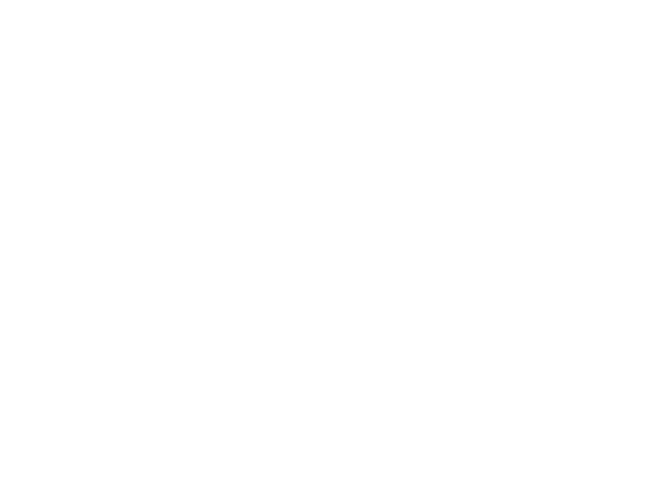

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(factor_graph)
plt.show()

In [112]:
phi1 = DiscreteFactor(['A', 'B'], [2, 2], np.random.rand(4))
phi2 = DiscreteFactor(['B', 'C'], [2, 2], np.random.rand(4))
phi3 = DiscreteFactor(['C', 'A'], [2, 2], np.random.rand(4))
factor_graph.add_factors(phi1, phi2, phi3)
print(factor_graph)

FactorGraph with 7 nodes and 6 edges


In [116]:
from pgmpy.models import MarkovNetwork
mm =MarkovNetwork()
mm.add_nodes_from(['A', 'B', 'C'])
mm.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])
mm.add_factors(phi1, phi2, phi3)
print(mm)

MarkovNetwork with 3 nodes and 3 edges


In [118]:
factor_graph_from_mm = mm.to_factor_graph()
print(factor_graph_from_mm)

FactorGraph with 6 nodes and 6 edges


In [119]:
factor_graph_from_mm.nodes()

NodeView(('A', 'B', 'C', 'phi_A_B', 'phi_B_C', 'phi_C_A'))

In [120]:
factor_graph.edges()

EdgeView([('A', 'phi1'), ('A', 'phi3'), ('B', 'phi1'), ('B', 'phi2'), ('C', 'phi2'), ('C', 'phi3')])

In [124]:
mm =MarkovNetwork()
mm.add_nodes_from( ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
mm.add_edges_from([('x1', 'x3'), ('x1', 'x4'), ('x2', 'x4'),
                    ('x2', 'x5'), ('x3', 'x6'), ('x4', 'x6'),
                    ('x4', 'x7'), ('x5', 'x7')])

In [125]:
 mm.get_local_independencies()

(x1 ⟂ x5, x6, x2, x7 | x3, x4)
(x2 ⟂ x7, x3, x1, x6 | x4, x5)
(x3 ⟂ x4, x5, x2, x7 | x1, x6)
(x4 ⟂ x3, x5 | x1, x2, x6, x7)
(x5 ⟂ x3, x4, x1, x6 | x2, x7)
(x6 ⟂ x5, x1, x2, x7 | x3, x4)
(x7 ⟂ x3, x1, x2, x6 | x4, x5)

In [127]:
mm.render()
plt.show()

AttributeError: 'MarkovNetwork' object has no attribute 'render'

In [132]:
import daft
from daft import PGM

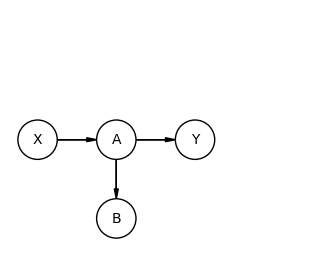

In [133]:
#@title # Game 1
#@markdown While this is a "trivial" example, many statisticians would consider including either or both A and B in their models "just for good measure".  Notice though how controlling for A would close off the path of causal information from X to Y, actually *impeding* your effort to measure that effect.
pgm = PGM(shape=[4, 3])

pgm.add_node(daft.Node('X', r"X", 1, 2))
pgm.add_node(daft.Node('Y', r"Y", 3, 2))
pgm.add_node(daft.Node('A', r"A", 2, 2))
pgm.add_node(daft.Node('B', r"B", 2, 1))


pgm.add_edge('X', 'A')
pgm.add_edge('A', 'Y')
pgm.add_edge('A', 'B')

pgm.render()
plt.show()

In [146]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination 
from pgmpy.factors.discrete.CPD import TabularCPD

In [171]:
restaurant = BayesianNetwork(
                               [('location', 'cost'),
                                ('quality', 'cost'), 
                                ('cost', 'no_of_people'), 
                                ('location', 'no_of_people')])
cpd_location = TabularCPD('location', 2, [[0.6], [0.4]])
cpd_quality = TabularCPD('quality', 3, [[0.3],[ 0.5], [0.2]])
cpd_cost = TabularCPD('cost', 2, 
                              [[0.8, 0.6, 0.1, 0.6, 0.6, 0.05], 
                               [0.2, 0.4, 0.9, 0.4, 0.4, 0.95]], 
                               ['location', 'quality'], [2, 3])
cpd_no_of_people = TabularCPD(
                            'no_of_people', 2,
                            [[0.6, 0.8, 0.1, 0.6], 
                             [0.4, 0.2, 0.9, 0.4]],
                             ['cost', 'location'], [2, 2])
restaurant.add_cpds(cpd_location, cpd_quality, 
                            cpd_cost, cpd_no_of_people)

In [172]:
restaurant_inference = VariableElimination(restaurant)

In [173]:
print(restaurant.get_cpds('cost'))

+----------+-------------+-------------+-------------+-------------+-------------+-------------+
| location | location(0) | location(0) | location(0) | location(1) | location(1) | location(1) |
+----------+-------------+-------------+-------------+-------------+-------------+-------------+
| quality  | quality(0)  | quality(1)  | quality(2)  | quality(0)  | quality(1)  | quality(2)  |
+----------+-------------+-------------+-------------+-------------+-------------+-------------+
| cost(0)  | 0.8         | 0.6         | 0.1         | 0.6         | 0.6         | 0.05        |
+----------+-------------+-------------+-------------+-------------+-------------+-------------+
| cost(1)  | 0.2         | 0.4         | 0.9         | 0.4         | 0.4         | 0.95        |
+----------+-------------+-------------+-------------+-------------+-------------+-------------+


In [177]:
print(restaurant_inference.query(variables=['location','no_of_people']))

+-------------+-----------------+------------------------------+
| location    | no_of_people    |   phi(location,no_of_people) |
+=============+=================+==============================+
| location(0) | no_of_people(0) |                       0.2280 |
+-------------+-----------------+------------------------------+
| location(0) | no_of_people(1) |                       0.3720 |
+-------------+-----------------+------------------------------+
| location(1) | no_of_people(0) |                       0.2792 |
+-------------+-----------------+------------------------------+
| location(1) | no_of_people(1) |                       0.1208 |
+-------------+-----------------+------------------------------+


In [179]:
print(restaurant_inference.query(variables=['no_of_people'],evidence={'location': 1}))

+-----------------+---------------------+
| no_of_people    |   phi(no_of_people) |
+=================+=====================+
| no_of_people(0) |              0.6980 |
+-----------------+---------------------+
| no_of_people(1) |              0.3020 |
+-----------------+---------------------+


In [180]:
a=restaurant_inference.query(
                      variables=['no_of_people'], 
                      evidence={'location': 1, 'quality': 1})
print(a)

+-----------------+---------------------+
| no_of_people    |   phi(no_of_people) |
+=================+=====================+
| no_of_people(0) |              0.7200 |
+-----------------+---------------------+
| no_of_people(1) |              0.2800 |
+-----------------+---------------------+


In [181]:
induced_graph = restaurant_inference.induced_graph(
                 ['cost', 'location', 'no_of_people', 'quality'])
print(induced_graph)

Graph with 4 nodes and 6 edges


In [182]:
induced_graph.nodes()

NodeView(('no_of_people', 'quality', 'cost', 'location'))

In [190]:
from pgmpy.models import JunctionTree

junction_tree = JunctionTree()
junction_tree.add_nodes_from([('A', 'B', 'C'), 
                                      ('C', 'D')])
junction_tree.add_edge(('A', 'B', 'C'), ('C', 'D'))
#junction_tree.add_edge(('A', 'B', 'C'), ('D', 'E', 'F'))

In [193]:
from pgmpy.models import BayesianNetwork, MarkovNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.factors.discrete import DiscreteFactor

In [196]:
model = BayesianNetwork(
                      [('rain', 'traffic_jam'),
                       ('accident', 'traffic_jam'),
                       ('traffic_jam', 'long_queues'), 
                       ('traffic_jam', 'late_for_school'),
                       ('getting_up_late', 'late_for_school')])
cpd_rain = TabularCPD('rain', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
cpd_traffic_jam = TabularCPD(
                            'traffic_jam', 2,
                            [[0.9, 0.6, 0.7, 0.1], 
                            [0.1, 0.4, 0.3, 0.9]],                                                                        
                            evidence=['rain', 'accident'],
                            evidence_card=[2, 2])
cpd_getting_up_late = TabularCPD('getting_up_late', 2,
                                         [[0.6], [0.4]])
cpd_late_for_school = TabularCPD(
                            'late_for_school', 2,                                                             
                            [[0.9, 0.45, 0.8, 0.1],                                             
                            [0.1, 0.55, 0.2, 0.9]],
                            evidence=['getting_up_late',                       
                                      'traffic_jam'],
                            evidence_card=[2, 2])
cpd_long_queues = TabularCPD('long_queues', 2,                          
                                     [[0.9, 0.2],
                                      [0.1, 0.8]],
                                     evidence=['traffic_jam'],
                                     evidence_card=[2])
model.add_cpds(cpd_rain, cpd_accident, 
                        cpd_traffic_jam, cpd_getting_up_late, 
                        cpd_late_for_school, cpd_long_queues)

In [198]:
junction_tree_bm = model.to_junction_tree() 
type(junction_tree_bm)

pgmpy.models.JunctionTree.JunctionTree

In [199]:
junction_tree_bm.nodes()

NodeView((('traffic_jam', 'long_queues'), ('traffic_jam', 'late_for_school', 'getting_up_late'), ('traffic_jam', 'accident', 'rain')))

In [200]:
junction_tree_bm.edges()

EdgeView([(('traffic_jam', 'long_queues'), ('traffic_jam', 'late_for_school', 'getting_up_late')), (('traffic_jam', 'long_queues'), ('traffic_jam', 'accident', 'rain'))])

In [202]:
phi1 = DiscreteFactor(['a', 'b'], [2, 3], range(6))
phi2 = DiscreteFactor(['b'], [3], range(3))
psi = phi1 / phi2
print(psi)

+------+------+------------+
| a    | b    |   phi(a,b) |
+======+======+============+
| a(0) | b(0) |     0.0000 |
+------+------+------------+
| a(0) | b(1) |     1.0000 |
+------+------+------------+
| a(0) | b(2) |     1.0000 |
+------+------+------------+
| a(1) | b(0) |   inf      |
+------+------+------------+
| a(1) | b(1) |     4.0000 |
+------+------+------------+
| a(1) | b(2) |     2.5000 |
+------+------+------------+


C:\Users\richi\anaconda3\envs\pytorch\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:787: RuntimeWarning: divide by zero encountered in divide
  phi.values = phi.values / phi1.values
C:\Users\richi\anaconda3\envs\pytorch\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:787: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi1.values


<Axes: >

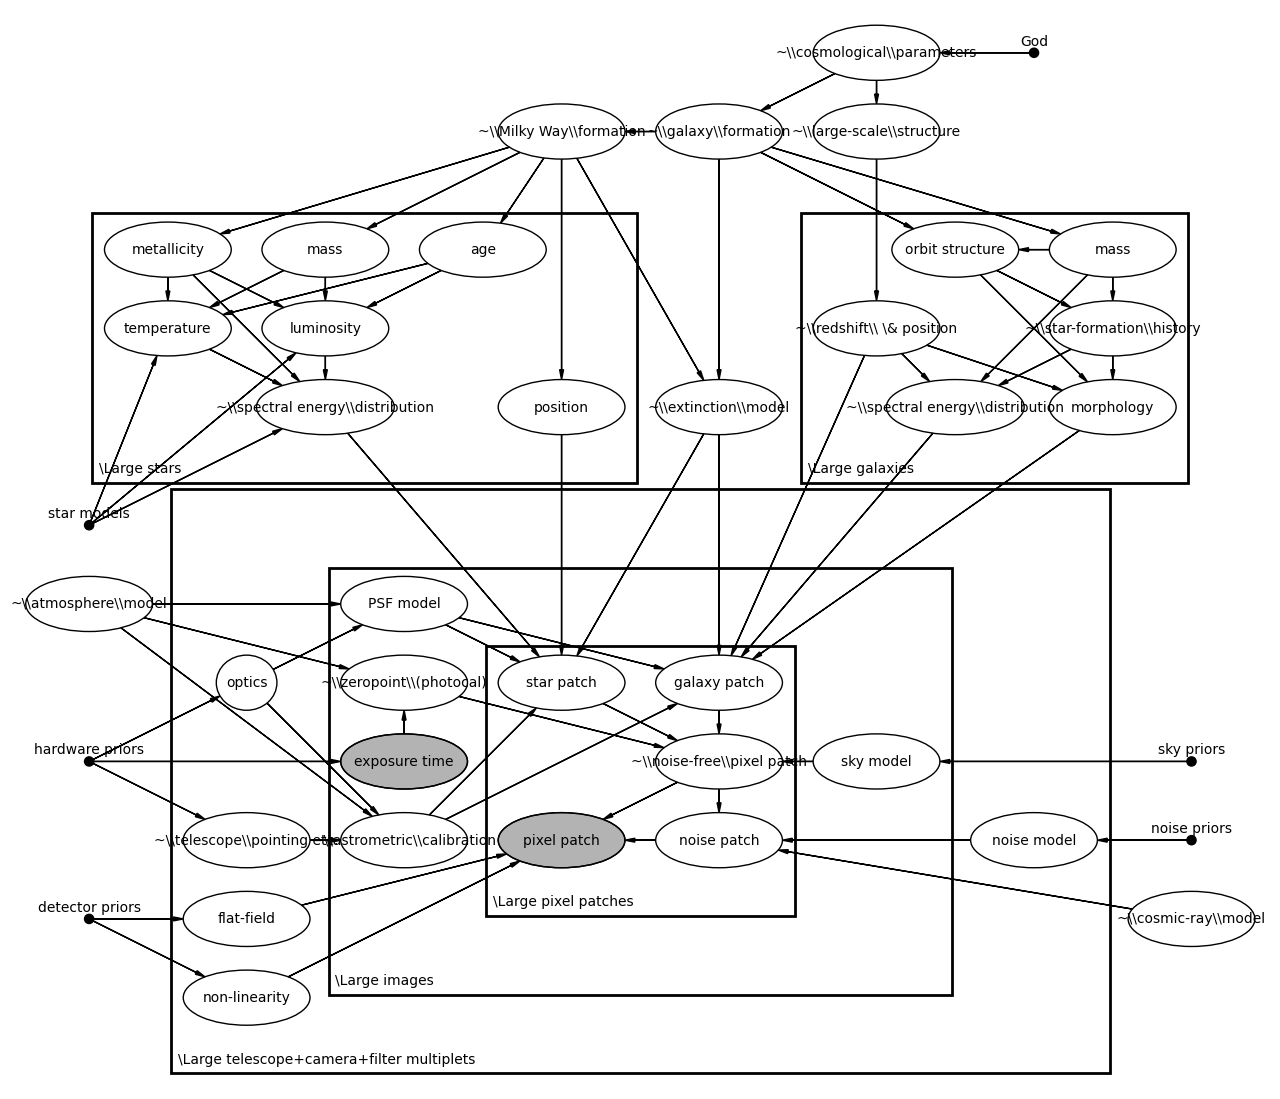

In [1]:
import daft

pgm = daft.PGM(grid_unit=4.0, node_unit=1.4)

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [1.5 + tweak, 0.5 + tweak, 6.0 - 2 * tweak, 3.75 - 2 * tweak],
    label=r"\Large telescope+camera+filter multiplets",
    rect_params=rect_params,
)
pgm.add_plate(
    [2.5 + tweak, 1.0 + tweak, 4.0 - 2 * tweak, 2.75 - 2 * tweak],
    label=r"\Large images",
    rect_params=rect_params,
)
pgm.add_plate(
    [3.5 + tweak, 1.5 + tweak, 2.0 - 2 * tweak, 1.75 - 2 * tweak],
    label=r"\Large pixel patches",
    rect_params=rect_params,
)
pgm.add_plate(
    [1.0 + tweak, 4.25 + tweak, 3.5 - 2 * tweak, 1.75 - 2 * tweak],
    label=r"\Large stars",
    rect_params=rect_params,
)
pgm.add_plate(
    [5.5 + tweak, 4.25 + tweak, 2.5 - 2 * tweak, 1.75 - 2 * tweak],
    label=r"\Large galaxies",
    rect_params=rect_params,
)

# ONLY pixels are observed
asp = 2.3
pgm.add_node("true pixels", r"~\\noise-free\\pixel patch", 5.0, 2.5, aspect=asp)
pgm.add_node("pixels", r"pixel patch", 4.0, 2.0, observed=True, aspect=asp)
pgm.add_edge("true pixels", "pixels")

# The sky
pgm.add_node("sky", r"sky model", 6.0, 2.5, aspect=asp)
pgm.add_edge("sky", "true pixels")
pgm.add_node("sky prior", r"sky priors", 8.0, 2.5, fixed=True)
pgm.add_edge("sky prior", "sky")

# Stars
pgm.add_node("star patch", r"star patch", 4.0, 3.0, aspect=asp)
pgm.add_edge("star patch", "true pixels")
pgm.add_node("star SED", r"~\\spectral energy\\distribution", 2.5, 4.75, aspect=asp + 0.2)
pgm.add_edge("star SED", "star patch")
pgm.add_node("star position", r"position", 4.0, 4.75, aspect=asp)
pgm.add_edge("star position", "star patch")
pgm.add_node("temperature", r"temperature", 1.5, 5.25, aspect=asp)
pgm.add_edge("temperature", "star SED")
pgm.add_node("luminosity", r"luminosity", 2.5, 5.25, aspect=asp)
pgm.add_edge("luminosity", "star SED")
pgm.add_node("metallicity", r"metallicity", 1.5, 5.75, aspect=asp)
pgm.add_edge("metallicity", "star SED")
pgm.add_edge("metallicity", "temperature")
pgm.add_edge("metallicity", "luminosity")
pgm.add_node("mass", r"mass", 2.5, 5.75, aspect=asp)
pgm.add_edge("mass", "temperature")
pgm.add_edge("mass", "luminosity")
pgm.add_node("age", r"age", 3.5, 5.75, aspect=asp)
pgm.add_edge("age", "temperature")
pgm.add_edge("age", "luminosity")
pgm.add_node("star models", r"star models", 1.0, 4.0, fixed=True)
pgm.add_edge("star models", "temperature")
pgm.add_edge("star models", "luminosity")
pgm.add_edge("star models", "star SED")

# Galaxies
pgm.add_node("galaxy patch", r"galaxy patch", 5.0, 3.0, aspect=asp)
pgm.add_edge("galaxy patch", "true pixels")
pgm.add_node("galaxy SED", r"~\\spectral energy\\distribution", 6.5, 4.75, aspect=asp + 0.2)
pgm.add_edge("galaxy SED", "galaxy patch")
pgm.add_node("morphology", r"morphology", 7.5, 4.75, aspect=asp)
pgm.add_edge("morphology", "galaxy patch")
pgm.add_node("SFH", r"~\\star-formation\\history", 7.5, 5.25, aspect=asp)
pgm.add_edge("SFH", "galaxy SED")
pgm.add_edge("SFH", "morphology")
pgm.add_node("galaxy position", r"~\\redshift\\ \& position", 6.0, 5.25, aspect=asp)
pgm.add_edge("galaxy position", "galaxy SED")
pgm.add_edge("galaxy position", "morphology")
pgm.add_edge("galaxy position", "galaxy patch")
pgm.add_node("dynamics", r"orbit structure", 6.5, 5.75, aspect=asp)
pgm.add_edge("dynamics", "morphology")
pgm.add_edge("dynamics", "SFH")
pgm.add_node("galaxy mass", r"mass", 7.5, 5.75, aspect=asp)
pgm.add_edge("galaxy mass", "dynamics")
pgm.add_edge("galaxy mass", "galaxy SED")
pgm.add_edge("galaxy mass", "SFH")

# Universals
pgm.add_node("extinction model", r"~\\extinction\\model", 5.0, 4.75, aspect=asp)
pgm.add_edge("extinction model", "star patch")
pgm.add_edge("extinction model", "galaxy patch")
pgm.add_node("MW", r"~\\Milky Way\\formation", 4.0, 6.5, aspect=asp)
pgm.add_edge("MW", "metallicity")
pgm.add_edge("MW", "mass")
pgm.add_edge("MW", "age")
pgm.add_edge("MW", "star position")
pgm.add_edge("MW", "extinction model")
pgm.add_node("galaxy formation", r"~\\galaxy\\formation", 5.0, 6.5, aspect=asp)
pgm.add_edge("galaxy formation", "MW")
pgm.add_edge("galaxy formation", "dynamics")
pgm.add_edge("galaxy formation", "galaxy mass")
pgm.add_edge("galaxy formation", "extinction model")
pgm.add_node("LSS", r"~\\large-scale\\structure", 6.0, 6.5, aspect=asp)
pgm.add_edge("LSS", "galaxy position")
pgm.add_node("cosmology", r"~\\cosmological\\parameters", 6.0, 7.0, aspect=asp)
pgm.add_edge("cosmology", "LSS")
pgm.add_edge("cosmology", "galaxy formation")
pgm.add_node("god", r"God", 7.0, 7.0, fixed=True)
pgm.add_edge("god", "cosmology")

# Sensitivity
pgm.add_node("zeropoint", r"~\\zeropoint\\(photocal)", 3.0, 3.0, aspect=asp)
pgm.add_edge("zeropoint", "true pixels")
pgm.add_node("exposure time", r"exposure time", 3.0, 2.5, observed=True, aspect=asp)
pgm.add_edge("exposure time", "zeropoint")

# The PSF
pgm.add_node("WCS", r"~\\astrometric\\calibration", 3.0, 2.0, aspect=asp)
pgm.add_edge("WCS", "star patch")
pgm.add_edge("WCS", "galaxy patch")
pgm.add_node("psf", r"PSF model", 3.0, 3.5, aspect=asp)
pgm.add_edge("psf", "star patch")
pgm.add_edge("psf", "galaxy patch")
pgm.add_node("optics", r"optics", 2.0, 3.0, aspect=asp - 1.2)
pgm.add_edge("optics", "psf")
pgm.add_edge("optics", "WCS")
pgm.add_node("atmosphere", r"~\\atmosphere\\model", 1.0, 3.5, aspect=asp)
pgm.add_edge("atmosphere", "psf")
pgm.add_edge("atmosphere", "WCS")
pgm.add_edge("atmosphere", "zeropoint")

# The device
pgm.add_node("flatfield", r"flat-field", 2.0, 1.5, aspect=asp)
pgm.add_edge("flatfield", "pixels")
pgm.add_node("nonlinearity", r"non-linearity", 2.0, 1.0, aspect=asp)
pgm.add_edge("nonlinearity", "pixels")
pgm.add_node("pointing", r"~\\telescope\\pointing etc.", 2.0, 2.0, aspect=asp)
pgm.add_edge("pointing", "WCS")
pgm.add_node("detector", r"detector priors", 1.0, 1.5, fixed=True)
pgm.add_edge("detector", "flatfield")
pgm.add_edge("detector", "nonlinearity")
pgm.add_node("hardware", r"hardware priors", 1.0, 2.5, fixed=True)
pgm.add_edge("hardware", "pointing")
pgm.add_edge("hardware", "exposure time")
pgm.add_edge("hardware", "optics")

# Noise
pgm.add_node("noise patch", r"noise patch", 5.0, 2.0, aspect=asp)
pgm.add_edge("noise patch", "pixels")
pgm.add_edge("true pixels", "noise patch")
pgm.add_node("noise model", r"noise model", 7.0, 2.0, aspect=asp)
pgm.add_edge("noise model", "noise patch")
pgm.add_node("noise prior", r"noise priors", 8.0, 2.0, fixed=True)
pgm.add_edge("noise prior", "noise model")
pgm.add_node("cosmic rays", r"~\\cosmic-ray\\model", 8.0, 1.5, aspect=asp)
pgm.add_edge("cosmic rays", "noise patch")

# Render and save.
pgm.render()